<a href="https://colab.research.google.com/github/DhruvJ2k4/goku/blob/main/Bias2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install ucimlrepo


## Explanation of Core Logistic Regression Concepts

### Sigmoid Function

The sigmoid function, also known as the logistic function, is a crucial component of logistic regression. Its primary purpose is to take any real-valued number and map it to a value between 0 and 1. This output can then be interpreted as a probability. In the context of binary classification, this probability represents the likelihood that a given input belongs to the positive class.

The mathematical formula for the sigmoid function, denoted by $\sigma(z)$, is:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

Here, $z$ is the linear combination of the input features and the model's weights and bias ($z = \mathbf{w} \cdot \mathbf{x} + b$). The sigmoid function squashes this linear output into the (0, 1) range, making it suitable for probabilistic interpretation.

### Binary Cross-Entropy Loss Function

The binary cross-entropy loss function is commonly used in binary classification problems to measure the performance of a logistic regression model. It quantifies how well the model's predicted probabilities align with the actual class labels. The goal during training is to minimize this loss function.

The binary cross-entropy loss is particularly suitable for binary classification because it heavily penalizes predictions that are confident but incorrect. For example, if the true label is 1 but the model predicts a probability close to 0, the loss will be very high. Conversely, if the true label is 1 and the model predicts a probability close to 1, the loss will be low.

The mathematical formula for the binary cross-entropy loss for a single training example is:

$$ L(\hat{y}, y) = - [y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})] $$

Where:
- $y$ is the actual class label (0 or 1).
- $\hat{y}$ is the predicted probability of the positive class (output of the sigmoid function).

For a dataset of $N$ training examples, the total binary cross-entropy loss is typically the average loss over all examples:

$$ J(\mathbf{w}, b) = - \frac{1}{N} \sum_{i=1}^{N} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})] $$

Minimizing this function helps the model learn weights and a bias that produce predicted probabilities closer to the true labels.

## Explanation of Gradient Descent

### Gradient Descent

Gradient descent is an iterative optimization algorithm used to find the minimum of a function. In the context of machine learning, it's used to find the set of parameters (weights and bias) for a model that minimizes the loss function.

The algorithm starts with an initial set of parameters and repeatedly updates them in the direction opposite to the gradient of the loss function. The gradient points in the direction of the steepest increase in the function, so moving in the opposite direction leads towards a minimum.

The update rule for a parameter (e.g., a weight $w_j$ or the bias $b$) is:

$$ \theta_{new} = \theta_{old} - \alpha \nabla J(\theta_{old}) $$

Where:
- $\theta$ represents a parameter (weight or bias).
- $\alpha$ is the learning rate, a small positive value that controls the step size of each update.
- $\nabla J(\theta_{old})$ is the gradient of the loss function with respect to the parameter $\theta$ at the current parameter values.

The process continues for a fixed number of iterations or until the change in the loss function becomes very small.

### Gradient Calculation in Logistic Regression

To perform gradient descent for logistic regression, we need to calculate the partial derivatives of the binary cross-entropy loss function with respect to each weight ($w_j$) and the bias ($b$). These partial derivatives constitute the gradient.

Using the chain rule, the partial derivative of the loss function with respect to a weight $w_j$ for a single training example is:

$$ \frac{\partial L}{\partial w_j} = (\hat{y} - y) x_j $$

And the partial derivative with respect to the bias $b$ is:

$$ \frac{\partial L}{\partial b} = (\hat{y} - y) $$

Where:
- $\hat{y}$ is the predicted probability (output of the sigmoid function).
- $y$ is the actual class label.
- $x_j$ is the value of the $j$-th feature for the training example.

For the entire dataset, the gradient of the total loss function (average cross-entropy) with respect to each parameter is the average of the gradients for each training example:

$$ \frac{\partial J}{\partial w_j} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}^{(i)} - y^{(i)}) x_j^{(i)} $$

$$ \frac{\partial J}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}^{(i)} - y^{(i)}) $$

These gradients are then used in the gradient descent update rule to iteratively adjust the weights and bias to minimize the loss function and train the logistic regression model.

## Importing Dataset:

In [34]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fetch the dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets

bias_features = ['X2', 'X1', 'X3', 'X4', 'X5', 'X6', 'X12', 'X18']
X_bias = X[bias_features]

# Split data
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bias, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_b_scaled = scaler.fit_transform(X_train_b)
X_test_b_scaled = scaler.transform(X_test_b)

if isinstance(y_train_b, pd.DataFrame):
    y_train_b_np = y_train_b.values.reshape(-1, 1)
else:
    y_train_b_np = y_train_b.reshape(-1, 1)

if isinstance(y_test_b, pd.DataFrame):
    y_test_b_np = y_test_b.values.reshape(-1, 1)
else:
    y_test_b_np = y_test_b.reshape(-1, 1)

X_train_b_np = X_train_b_scaled
X_test_b_np = X_test_b_scaled

## Implement the sigmoid function


In [35]:
def sigmoid(z):
  """Calculates the sigmoid of z."""
  z = np.clip(z, -1000, 1000)
  return 1 / (1 + np.exp(-z))

## Implement the loss function


In [36]:
def compute_loss(y_true, y_pred):
  """
  Calculates the binary cross-entropy loss.

  Args:
    y_true: True labels (0 or 1), should be a column vector.
    y_pred: Predicted probabilities, should be a column vector.

  Returns:
    The average binary cross-entropy loss.
  """
  epsilon = 1e-15
  y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
  y_true = y_true.reshape(-1, 1) if y_true.ndim == 1 else y_true
  y_pred = y_pred.reshape(-1, 1) if y_pred.ndim == 1 else y_pred

  loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  return loss

## Implement the gradient calculation


In [37]:
def compute_gradients(X, y_true, y_pred, n_samples):
  """
  Calculates the gradients of the loss function with respect to weights and bias.

  Args:
    X: Features, should be a matrix (n_samples, n_features).
    y_true: True labels (0 or 1), should be a column vector (n_samples, 1).
    y_pred: Predicted probabilities, should be a column vector (n_samples, 1).
    n_samples: Number of samples.

  Returns:
    A tuple containing the gradients for weights (dw, shape (n_features, 1)) and bias (db, scalar).
  """
  y_true = y_true.reshape(-1, 1) if y_true.ndim == 1 else y_true
  y_pred = y_pred.reshape(-1, 1) if y_pred.ndim == 1 else y_pred
  error = y_pred - y_true
  dw = (1 / n_samples) * np.dot(X.T, error)
  db = (1 / n_samples) * np.sum(error)
  return dw, db

## Implement the training loop


In [38]:
def train_logistic_regression(X, y, learning_rate, n_epochs):
  """
  Trains a logistic regression model using gradient descent.

  Args:
    X: Features (numpy array, shape (n_samples, n_features)).
    y: True labels (numpy array, shape (n_samples, 1)).
    learning_rate: The learning rate for gradient descent.
    n_epochs: The number of training epochs.

  Returns:
    A tuple containing the trained weights (shape (n_features, 1)) and bias (scalar).
  """
  n_samples, n_features = X.shape

  # Initialize weights and bias
  weights = np.zeros((n_features, 1))
  bias = 0

  # Store loss history
  loss_history = []

  for epoch in range(n_epochs):
    # Calculate linear combination and apply sigmoid
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)

    # Calculate loss
    loss = compute_loss(y, y_pred)
    loss_history.append(loss)

    # Calculate gradients
    dw, db = compute_gradients(X, y, y_pred, n_samples)

    # Update weights and bias
    weights -= learning_rate * dw
    bias -= learning_rate * db

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss:.4f}")

  return weights, bias

## Train the model



In [39]:
learning_rate = 0.05
n_epochs = 1500

weights, bias = train_logistic_regression(X_train_b_np, y_train_b_np, learning_rate, n_epochs)

Epoch 100/1500, Loss: 0.5047
Epoch 200/1500, Loss: 0.4783
Epoch 300/1500, Loss: 0.4721
Epoch 400/1500, Loss: 0.4702
Epoch 500/1500, Loss: 0.4696
Epoch 600/1500, Loss: 0.4694
Epoch 700/1500, Loss: 0.4693
Epoch 800/1500, Loss: 0.4693
Epoch 900/1500, Loss: 0.4692
Epoch 1000/1500, Loss: 0.4692
Epoch 1100/1500, Loss: 0.4692
Epoch 1200/1500, Loss: 0.4692
Epoch 1300/1500, Loss: 0.4692
Epoch 1400/1500, Loss: 0.4692
Epoch 1500/1500, Loss: 0.4692


## Make predictions


In [40]:
def predict(X, weights, bias, threshold=0.5):
  """
  Makes predictions using the trained logistic regression model.

  Args:
    X: Features (numpy array, shape (n_samples, n_features)).
    weights: Trained weights (shape (n_features, 1)).
    bias: Trained bias (scalar).
    threshold: The threshold for converting probabilities to binary predictions.

  Returns:
    Binary predictions (0 or 1), shape (n_samples, 1).
  """
  linear_model = np.dot(X, weights) + bias
  y_predicted_proba = sigmoid(linear_model)
  y_predicted_cls = (y_predicted_proba >= threshold).astype(int)
  return y_predicted_cls

In [41]:
y_pred_manual = predict(X_test_b_np, weights, bias)

## Evaluate and analyze bias


In [42]:
from sklearn.metrics import recall_score, accuracy_score
import matplotlib.pyplot as plt

X_test_b_df = X_test_b.copy()
X_test_b_df['gender'] = X_test_b_df['X2']
X_test_b_df['true'] = y_test_b_np.flatten()
y_pred_manual_flat = y_pred_manual.flatten() if y_pred_manual.ndim > 1 else y_pred_manual
X_test_b_df['pred'] = y_pred_manual_flat


# Separate by gender
male = X_test_b_df[X_test_b_df['gender'] == 1]
female = X_test_b_df[X_test_b_df['gender'] == 2]

# Positive prediction rates
positive_rate_male = male['pred'].mean()
positive_rate_female = female['pred'].mean()

# Demographic Parity Difference
dpd = positive_rate_female - positive_rate_male

# Disparate Impact Ratio (DIR)
dir_ratio = positive_rate_female / positive_rate_male if positive_rate_male != 0 else np.inf


# True Positive Rate (Recall)
tpr_male = recall_score(male['true'], male['pred'])
tpr_female = recall_score(female['true'], female['pred'])

# Equal Opportunity Difference (Female TPR - Male TPR)
eod = tpr_female - tpr_male

# Accuracy for each group
acc_male = accuracy_score(male['true'], male['pred'])
acc_female = accuracy_score(female['true'], female['pred'])

# Accuracy Difference
acc_diff = acc_female - acc_male

print("Fairness Metrics for Manual Logistic Regression:")
print(f"Demographic Parity Difference (Female - Male): {dpd:.4f}  # closer to 0 = fairer")
print(f"Disparate Impact Ratio (Female / Male): {dir_ratio:.4f}     # closer to 1 = fairer, < 0.8 or > 1.25 may indicate bias")
print(f"Equal Opportunity Difference (Female - Male TPR): {eod:.4f} # closer to 0 = fairer recall")
print(f"Accuracy Difference (Female - Male): {acc_diff:.4f}         # closer to 0 = model performs equally")

Fairness Metrics for Manual Logistic Regression:
Demographic Parity Difference (Female - Male): -0.0130  # closer to 0 = fairer
Disparate Impact Ratio (Female / Male): 0.8402     # closer to 1 = fairer, < 0.8 or > 1.25 may indicate bias
Equal Opportunity Difference (Female - Male TPR): -0.0015 # closer to 0 = fairer recall
Accuracy Difference (Female - Male): 0.0250         # closer to 0 = model performs equally


## Visualize fairness metrics


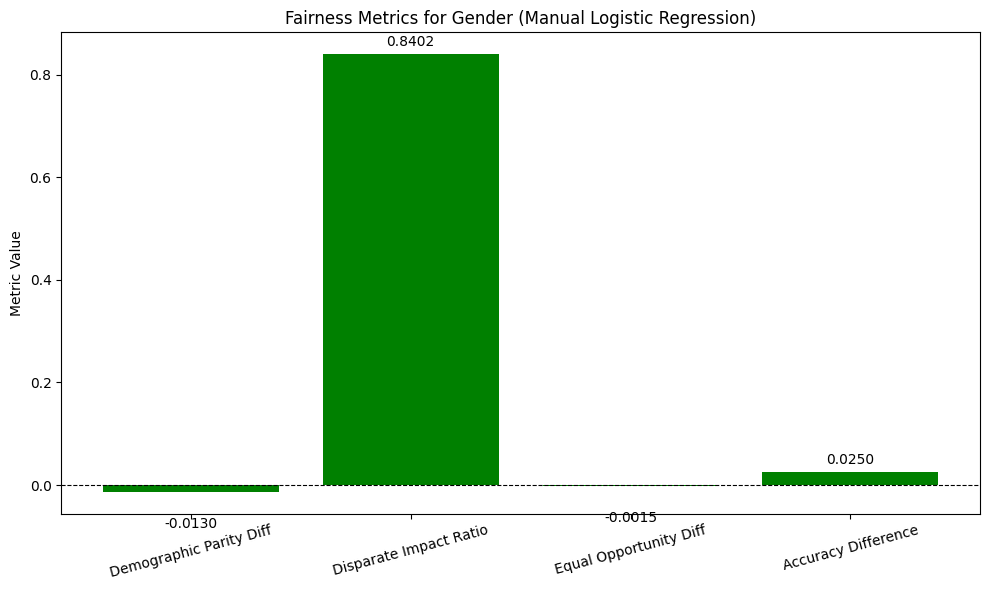

In [43]:
# Fairness metric values
metrics = {
    "Demographic Parity Diff": dpd,
    "Disparate Impact Ratio": dir_ratio,
    "Equal Opportunity Diff": eod,
    "Accuracy Difference": acc_diff
}

colors = []
for k, v in metrics.items():
    if k in ["Demographic Parity Diff", "Equal Opportunity Diff", "Accuracy Difference"]:
        colors.append('green' if abs(v) < 0.1 else 'red')
    elif k == "Disparate Impact Ratio":
        colors.append('green' if 0.8 <= v <= 1.25 else 'red')
    else:
        colors.append('gray')

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics.keys(), metrics.values(), color=colors)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01 if yval >= 0 else yval - 0.05,
             f'{yval:.4f}', ha='center', va='bottom' if yval >= 0 else 'top')

plt.title("Fairness Metrics for Gender (Manual Logistic Regression)")
plt.ylabel("Metric Value")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

Based on the manual logistic regression model trained on the selected features of the Default of Credit Card Clients dataset, the fairness analysis reveals the following:

*   **Demographic Parity Difference (-0.0130):** The model's positive prediction rate (predicting default) is very similar between genders.
*   **Disparate Impact Ratio (0.8402):** This ratio is slightly below the commonly used threshold of 0.8, suggesting a minor difference in the likelihood of being predicted as a defaulter between genders.
*   **Equal Opportunity Difference (-0.0015):** The model is nearly equally effective at identifying true defaulters for both genders.
*   **Accuracy Difference (0.0250):** The model performs similarly well for both groups in terms of overall correct predictions.

In summary, while the model shows good Equal Opportunity and overall Accuracy across genders, the Disparate Impact Ratio being slightly below 0.8 suggests a potential area for further investigation regarding how frequently each gender is predicted to default. This highlights the importance of examining multiple fairness metrics to get a comprehensive understanding of potential biases.

